### Prepping for the Final Project

Jupyter notebook for practicing with graph data science.

Some of the code used at the start of this notebook is patterned after chapter 2 in
    Graph Data Science with Neo4j
    Estelle Scifo, Packt Publishing Ltd, 2023

Mike Goodrich

Brigham Young University

March 2024, Updated March 2025

---

Read nodes

In [1]:
import pandas as pd
nodes_data = pd.read_csv('cs236_data/nodes.csv')
nodes_data.head()

,node,type,value
0,530,person,TA
1,0,person,TA
2,80,person,Student
3,531,person,Student
4,162,person,Student


Explore what is unique in the database

In [4]:
nodes_data.value_counts('type')

type
thread     342
person     315
channel     14
Name: count, dtype: int64

In [8]:
print(nodes_data[nodes_data["type"] == "person"]["value"].unique())

['TA' 'Student' 'Instructor']


In [9]:
print(nodes_data[nodes_data["type"] == "thread"]["value"].unique())

['Is there a zoom link for goodrich class' 'Project 3 Hackathon'
 'Will there be a final' 'For question 2 on the practice final ('
 '@instructor @teachingassistants answer' 'The sand answer'
 'Multiple Resolution' 'Exception'
 'maybe it s just sundays that don t count' 'Autograder problem'
 'How do we access class via zoom' 'Pushing Code to GitHub'
 'Project 2 lab session recording'
 'Does png work I assume not since PNG isn'
 'Are there tas working right now' 'Class is in person today right'
 'So i ve finished the project but i have'
 'This is just a suggestion but would it'
 'I bought my textbook online on RedShelf'
 'Anyone know where I can find the zoom'
 'Hey guys can somebody tell me where I' 'Hehe'
 'Does anyone know what program Professor' 'New schedule'
 'Figures for 13.2.2' 'Project Submission Question' 'When should I start?'
 'Textbook pdf' 'Zoom links' "That's the initial matrix for Floyd's"
 "Floyd's" 'When you have something in {} like {3,4'
 'Sounds good to me! Do you wa

In [10]:
print(nodes_data[nodes_data["type"] == "channel"]["value"].unique())

['general' 'project-1' 'project-2' 'tutorials' 'project-3' 'project-4'
 'project-5' 'exams' 'homework' 'random' 'project-0' 'announcements'
 'ta-schedule-updates' 'exam-grading-excpetions']


In [5]:
nodes_data.value_counts('value')

value
Student                                               303
TA                                                     11
Thread                                                  3
GitHub                                                  2
Sorted                                                  1
                                                     ... 
Hye everyone! I woke up feeling sick so                 1
How to test for bi-jection ect. on a math function      1
How to rename the new relations                         1
How to interpret the test demo code                     1
you mean writing the union function?                    1
Name: count, Length: 356, dtype: int64

Read edge data and get familiar with it

In [11]:
edges_data = pd.read_csv('cs236_data/edges.csv')
edges_data.head()

,source,target,edge_type,content
0,0,1,posted_in_channel,Project Submission Question
1,0,0,replied_to,I'm feeling better so I'll be in at around 11:30
2,0,2,replied_to,Nope
3,0,3,replied_to,Will there be any TAs today?
4,0,4,replied_to,"Yes, see the <#1148663286267641906> for specif..."


In [12]:
print(edges_data["edge_type"].unique())

['posted_in_channel' 'replied_to' 'posted_in_thread' 'thread_in_channel']


In [14]:
print(edges_data[edges_data["edge_type"] == "thread_in_channel"]["content"].unique())

[nan]


---

Create graph with nodes of different types

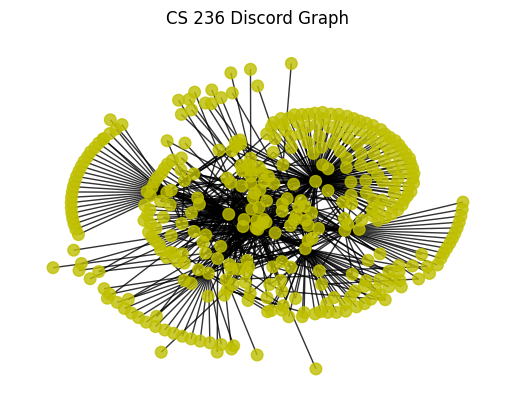

In [521]:
import networkx as nx
from graph_manager import graphHandler
G = nx.Graph()
for i in nodes_data.index:
    source = edges_data['source'][i]
    target = edges_data['target'][i]
    if source != target: # Don't include self loops
        G.add_edge(source, target)
class_manager = graphHandler(G, ['y' for node in G.nodes], use_pydot=True)
class_manager.showGraph(title="CS 236 Discord Graph")


In [522]:
# Takes a minute or two to run
# class_manager.showDendrogram()

Since creating the dendrogram is slow, I'll just show the plot here.
![Dendrogram of Discord data](figures/dendrogram_of_discord_graph.png)

The Louvain algorithm found 10 partitions.
Partition 0 is {1, 3, 7, 137, 9, 14, 279, 23, 285, 286, 287, 32, 34, 166, 167, 168, 174, 47, 304, 176, 177, 178, 175, 319, 65, 69, 210, 83, 348, 349, 354, 355, 356, 102, 244, 245, 253}
Partition 1 is {130, 331, 6, 8, 10, 11, 144, 159, 160, 161, 44, 45, 50, 186, 320, 321, 325, 326, 327, 328, 329, 330, 73, 332, 333, 334, 335, 336, 337, 338, 339, 80, 341, 342, 343, 344, 345, 346, 347, 86, 215, 96, 100, 113}
Partition 2 is {64, 261, 70, 71, 200, 266, 189, 88, 91, 93, 288, 33, 97, 289, 290, 291, 292, 99, 170, 250, 172, 48, 247, 248, 249, 58, 187, 188, 61}
Partition 3 is {257, 272, 273, 274, 252, 181, 182, 26, 251, 60, 29}
Partition 4 is {322, 323, 135, 136, 145, 275, 276, 277, 278, 149, 280, 281, 282, 157, 95, 293, 105, 106, 171, 173, 110, 111, 242, 179, 180, 246, 183, 184, 185}
Partition 5 is {192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 190, 191}
Partition 6 is {256, 258, 259, 260, 4, 262, 263, 264, 265, 26

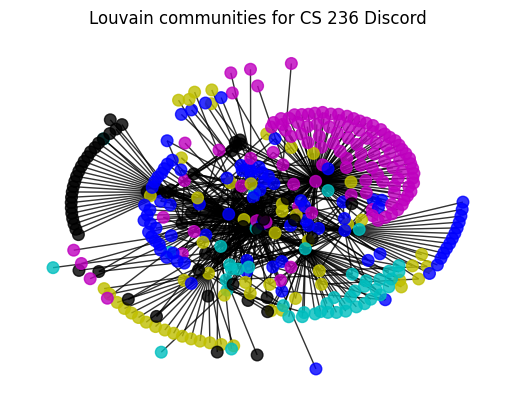

In [523]:
class_manager.showLouvainCommunities(title = "Louvain communities for CS 236 Discord")

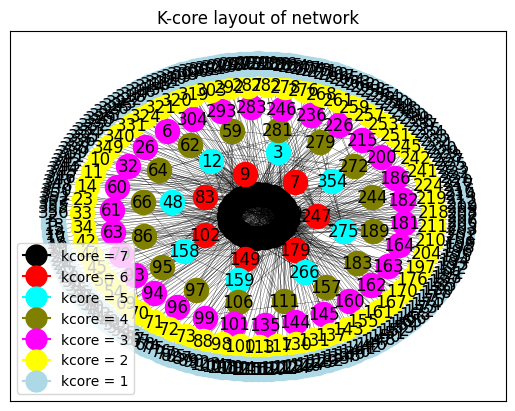

In [524]:
class_manager.show_kCores()

[0, 2]


/Users/mike/Dropbox/Mac/Documents/Classes/CS 575/Winter 2024/Code/CS575-Code-for-Slides-Winter-2024/Jupyter notebook tutorials/knowledge_graph_tutorials/utilities.py:75: ComplexWarning: Casting complex values to real discards the imaginary part
  z[i,0] = vector1[i]
/Users/mike/Dropbox/Mac/Documents/Classes/CS 575/Winter 2024/Code/CS575-Code-for-Slides-Winter-2024/Jupyter notebook tutorials/knowledge_graph_tutorials/utilities.py:76: ComplexWarning: Casting complex values to real discards the imaginary part
  z[i,1] = vector2[i]


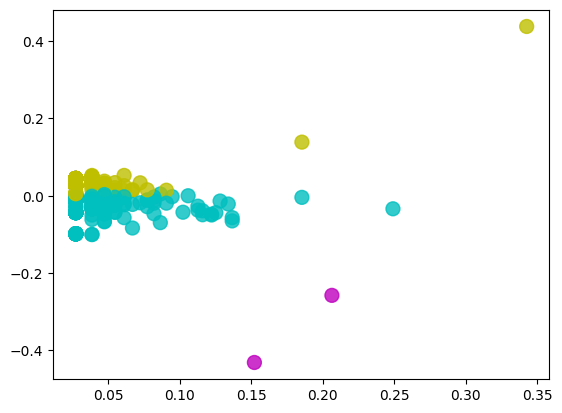

In [525]:
from utilities import get_two_fiedler_eigenvectors
from utilities import form_encoding
from utilities import get_colors_from_clusters
import matplotlib.pyplot as plt
L = nx.linalg.normalized_laplacian_matrix(class_manager.getGraph()).toarray()
v1,v2 = get_two_fiedler_eigenvectors(L)
embedding = form_encoding(v1, v2)
colors = get_colors_from_clusters(embedding, num_clusters=3)
plt.scatter(embedding[:,0], embedding[:,1],s=100,alpha = 0.8, color = colors);

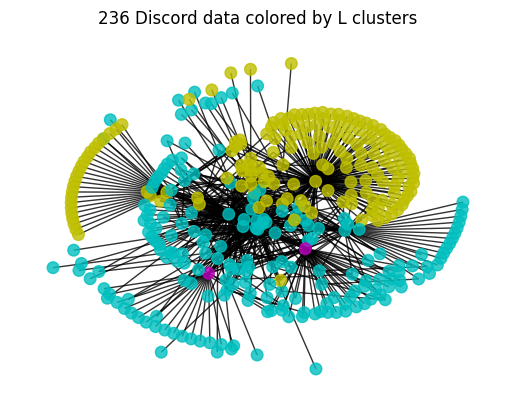

In [526]:
class_manager.showGraph(title = "236 Discord data colored by L clusters",agent_colors=colors)

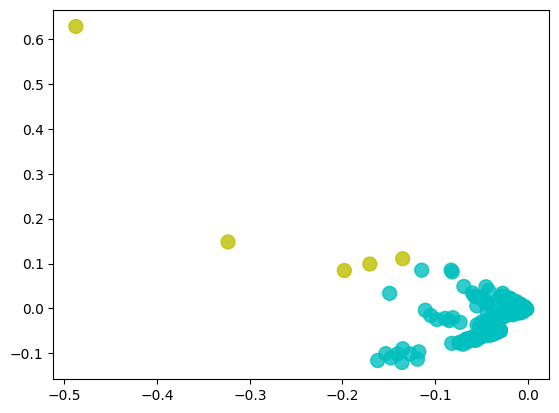

In [527]:
from utilities import get_largest_vectors
A = nx.linalg.adjacency_matrix(class_manager.getGraph()).toarray()
v1,v2 = get_largest_vectors(A)
embedding = form_encoding(v1, v2)
colors = get_colors_from_clusters(embedding, num_clusters=2)
plt.scatter(embedding[:,0], embedding[:,1],s=100,alpha = 0.8, color = colors);

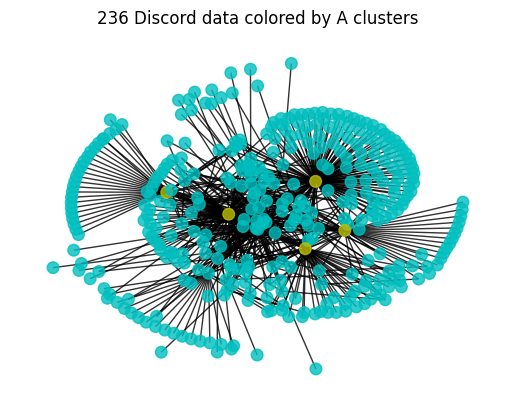

In [528]:
class_manager.showGraph(title = "236 Discord data colored by A clusters",agent_colors=colors)

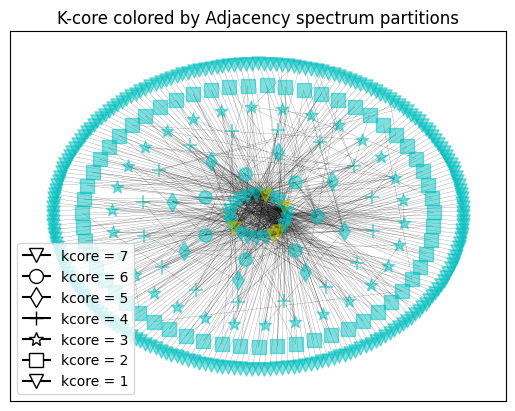

In [529]:
class_manager.show_kCores_by_partition(colors, title="K-core colored by Adjacency spectrum partitions")

---

Start to build the ontology and do projections. Check out node types and edge types.

In [530]:
nodes_data.value_counts('type')

type
thread     342
person     315
channel     14
Name: count, dtype: int64

In [531]:
edges_data.value_counts('edge_type')

edge_type
posted_in_thread     651
posted_in_channel    572
thread_in_channel    342
replied_to           294
Name: count, dtype: int64

Let's enrich what is in the node data stored in the graph. Let's add node types as node attributes, and edge_types as edge attributes.

In [532]:
node_type_dict = {nodes_data['node'][i]: 
                  nodes_data['type'][i] for i in nodes_data.index}
nx.set_node_attributes(G, node_type_dict, "node_type")
for node in G.nodes: print(node,G.nodes[node]['node_type'])

0 person
1 channel
2 person
3 person
4 person
5 person
6 person
7 person
8 person
9 person
10 person
11 person
12 person
13 person
14 thread
15 thread
16 thread
17 thread
18 thread
19 thread
20 thread
21 thread
22 thread
23 thread
24 thread
25 thread
26 thread
27 thread
28 thread
29 channel
30 person
31 person
32 thread
33 thread
34 thread
35 thread
36 thread
37 thread
38 thread
39 thread
40 thread
41 thread
42 thread
43 thread
44 thread
45 thread
46 thread
47 channel
48 person
49 person
50 person
51 thread
52 thread
53 thread
54 thread
55 thread
56 thread
57 thread
58 channel
59 person
60 person
61 person
62 person
63 person
64 person
65 person
66 person
67 thread
68 thread
69 thread
70 thread
71 thread
72 thread
73 thread
74 thread
75 thread
76 thread
77 thread
78 channel
79 person
80 person
81 person
82 person
83 person
84 person
85 thread
86 thread
87 thread
88 thread
89 thread
90 thread
91 channel
92 person
93 person
94 person
95 person
96 person
97 person
98 person
99 person
100 

In [533]:
edge_type_dict = {(edges_data['source'][i], edges_data['target'][i])
                   : edges_data['edge_type'][i] for i in edges_data.index}
edge_type = [(u,v,edge_type_dict[(u,v)]) for (u,v) in edge_type_dict.keys()]
nx.set_edge_attributes(G, edge_type_dict, "edge_type")
for edge in G.edges:
    print(G.edges[edge[0],edge[1]])

{'edge_type': 'posted_in_channel'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_thread'}
{'edge_type': 'posted_in_channel'}
{'edge_type': 'replied_to'}
{'edge_type': 'replied_to'}
{'edge_type': 'posted_in_thr

Color the nodes in the graph by their type

{'channel': 'y', 'thread': 'm', 'person': 'c'}


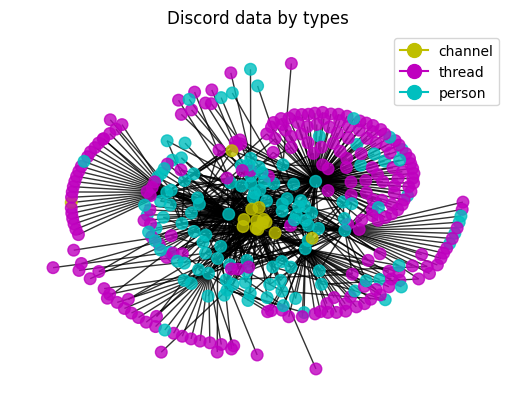

In [534]:
colors = []
H = class_manager.getGraph() # Get graph sorted by value
color_map = ['y', 'm', 'c', 'b', 'g', 'k']
types = list(set(node_type_dict.values()))
type_colors = {types[i]: color_map[i%len(color_map)] for i in range(len(types))}
print(type_colors)
legend_elements = []
for node_type in type_colors.keys():
    legend_elements.append(Line2D([0], [0], marker='o', color=type_colors[node_type], markerfacecolor = type_colors[node_type], label=node_type, markersize=10))
for node in H.nodes:
    #print(node, G.nodes[node]['node_type'])
    colors.append(type_colors[G.nodes[node]['node_type']])
class_manager.showGraph(title="Discord data by types", agent_colors=colors, legend=legend_elements)

Let's define a new ontology element. We'll say that two persons interacted with each other if 
 - one person replied to the other, or
 - both persons posted in the same thread
Let's see if we can construct this.

If it were a database, we'd have the following relations:
 - replied_to(person1, person2)
 - posted_in_thread(person, thread)
 - posted_in_channel(person, channel)
 - thread_in_channel(thread, channel)
We'll be ignoring channels, but we won't know how to do that for a minute.

Our rule is that two persons interacted with each other if they satisfy one of two conditions: replied or posted in same thread. This is written using relational operators as
 - interacted_with(person1, person2) $\leftarrow$ replied_to(person1, person2)
 - interacted_with(person1, person2) $\leftarrow$ interacted_with(person2, person1)
 - interacted_with(person1, person2) $\leftarrow$ posted_in_thread(person1, thread) $\wedge$ posted_in_thread(person2, thread)
 
Our query is then _interacted_with(person1, person2)_, which can be implemented using relational algebra.

When we use a knowledge graph, we try to implement queries like this using _graph projections_. Let's explore the first thing we did: ignore channels. This is implemented by projecting the current graph onto a new one without the channels.

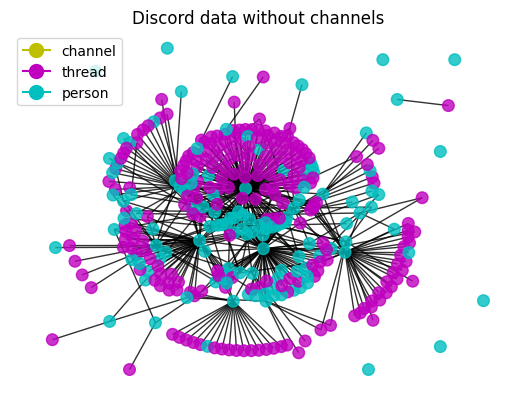

In [535]:
G.remove_nodes_from([node for node in G.nodes if G.nodes[node]['node_type'] == 'channel'])
projected_graph_manager = graphHandler(G, colormap=['y' for node in G.nodes], use_pydot=True)
#projected_graph_manager.showGraph()
colors = []
for node in G.nodes:
    colors.append(type_colors[G.nodes[node]['node_type']])
projected_graph_manager.showGraph(title="Discord data without channels", agent_colors=colors, legend=legend_elements)

We'll split this graph into two pieces: one based only on replied_to interactions and one based on interacted_with. The first graph is obtained by projecting out nodes that have the thread type.

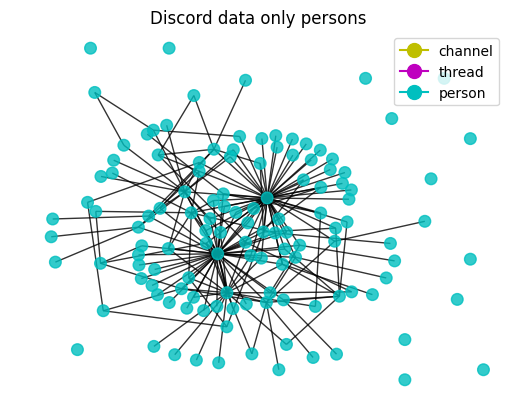

In [536]:
from copy import deepcopy
persons_graph = deepcopy(G)
persons_graph.remove_nodes_from([node for node in persons_graph.nodes if persons_graph.nodes[node]['node_type'] != 'person'])
#for node in persons_graph.nodes: print(node,persons_graph.nodes[node]['node_type'])
projected_graph_manager = graphHandler(persons_graph, colormap=['y' for node in persons_graph.nodes], use_pydot=True)
#projected_graph_manager.showGraph()
colors = []
for node in persons_graph.nodes:
    colors.append(type_colors[persons_graph.nodes[node]['node_type']])
projected_graph_manager.showGraph(title="Discord data only persons", agent_colors=colors, legend=legend_elements)

Let's remove the singletons. Those removed only posted in a channel, never posted in a thread, and never replied to anyone.

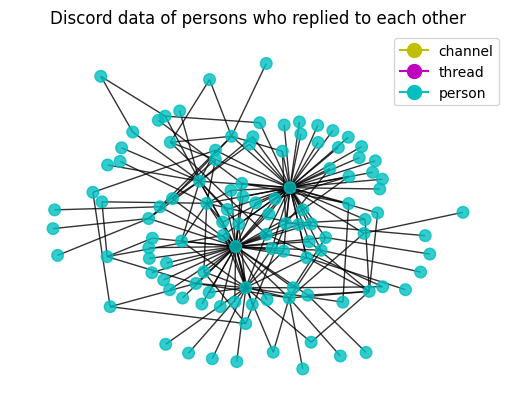

In [537]:
persons_graph.remove_nodes_from(list(nx.isolates(persons_graph)))
#for node in persons_graph.nodes: print(node,persons_graph.nodes[node]['node_type'])
projected_graph_manager = graphHandler(persons_graph, colormap=['y' for node in persons_graph.nodes], use_pydot=True)
#projected_graph_manager.showGraph()
colors = []
for node in persons_graph.nodes:
    colors.append(type_colors[persons_graph.nodes[node]['node_type']])
projected_graph_manager.showGraph(title="Discord data of persons who replied to each other", agent_colors=colors, legend=legend_elements)

In [538]:
print(f"There were {len(persons_graph.nodes)} persons who interacted with each other by replying to each other.")

There were 112 persons who interacted with each other by replying to each other.


---

The next step is to project out edges that are not posted_in_thread interactions.

In [539]:
from copy import deepcopy
in_thread_graph = deepcopy(G)
for edge in in_thread_graph.edges:
    #print(edge)
    #print(in_thread_graph.edges[edge])
    if in_thread_graph.edges[edge]['edge_type'] != 'posted_in_thread':
        #print(f"removing {edge} becaust its type is {in_thread_graph.edges[edge]['edge_type']}")
        in_thread_graph.remove_edge(edge[0],edge[1])
#for node in in_thread_graph.nodes: print(node,in_thread_graph.nodes[node]['node_type'])



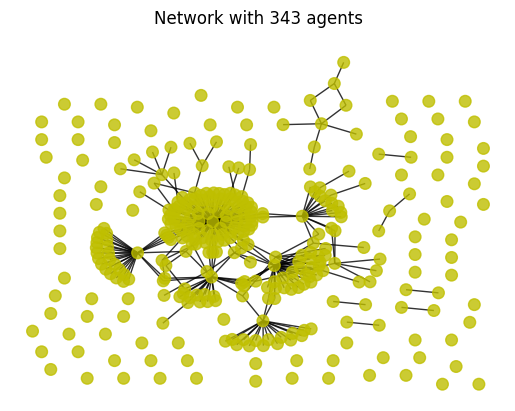

In [540]:
projected_in_thread_manager = graphHandler(in_thread_graph, colormap=['y' for _ in in_thread_graph.nodes], use_pydot=True)
projected_in_thread_manager.showGraph()


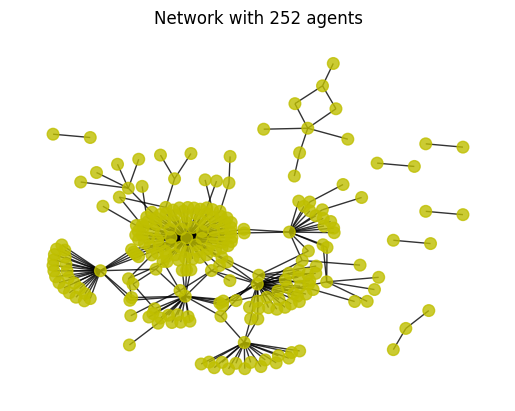

In [541]:
# remove isolated nodes
in_thread_graph.remove_nodes_from(list(nx.isolates(in_thread_graph)))
projected_in_thread_manager = graphHandler(in_thread_graph, colormap=['y' for _ in in_thread_graph.nodes], use_pydot=True)
projected_in_thread_manager.showGraph()

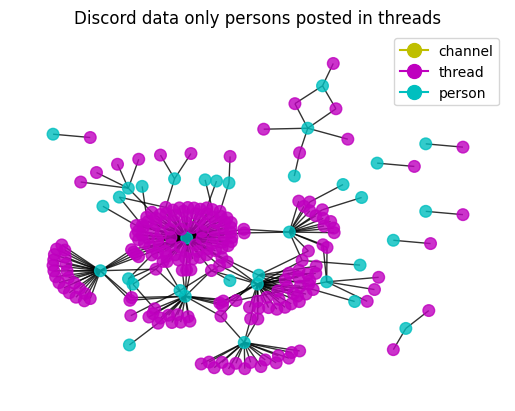

In [542]:
colors = []
for node in in_thread_graph.nodes:
    colors.append(type_colors[in_thread_graph.nodes[node]['node_type']])
projected_in_thread_manager.showGraph(title="Discord data only persons posted in threads", agent_colors=colors, legend=legend_elements)

Get biadjacency matrix. See [Networkx documentation biadjacency_matrix](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.matrix.biadjacency_matrix.html)

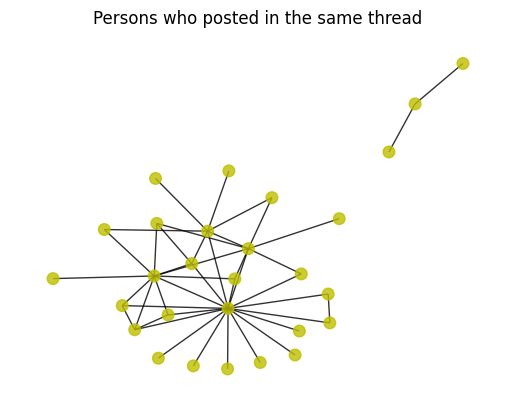

In [543]:
import numpy as np
A = nx.linalg.adjacency_matrix(in_thread_graph).toarray()
two_step_paths = A@A   
nodes = list(in_thread_graph.nodes)
knows_by_posting_graph = nx.Graph()
for i in range(len(in_thread_graph.nodes)):
    for j in range(len(in_thread_graph.nodes)):
        if i==j: continue
        #print(in_thread_graph.nodes[nodes[i]]['node_type'] == 'person')
        if two_step_paths[i,j] > 0 and in_thread_graph.nodes[nodes[i]]['node_type'] == 'person' and in_thread_graph.nodes[nodes[j]]['node_type'] == 'person':
            #print(in_thread_graph.nodes[nodes[i]]['node_type'] == 'person')
            knows_by_posting_graph.add_edge(nodes[i], nodes[j])
knows_by_posting_handler = graphHandler(knows_by_posting_graph, ['y' for node in knows_by_posting_graph.nodes])
knows_by_posting_handler.showGraph(title = "Persons who posted in the same thread")

In [544]:
print(f"There were {len(knows_by_posting_graph.nodes)} persons who interacted by posting to the same thread.")

There were 28 persons who interacted by posting to the same thread.


There are 116 persons who interacted with each other


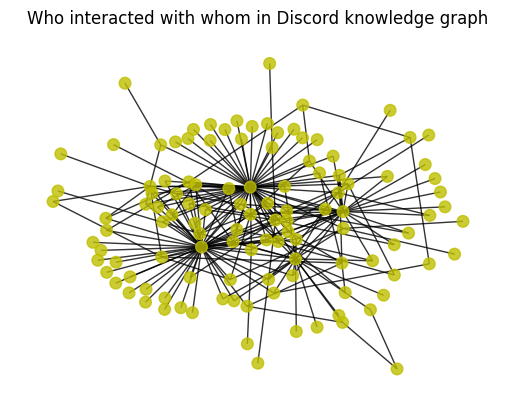

In [545]:
knows_graph = nx.Graph()
knows_graph.add_edges_from(persons_graph.edges)
knows_graph.add_edges_from(knows_by_posting_graph.edges)
knows_graph_handler = graphHandler(knows_graph, ['y' for node in knows_graph.nodes])
print(f"There are {len(knows_graph_handler.getGraph().nodes)} persons who interacted with each other")
knows_graph_handler.showGraph(title="Who interacted with whom in Discord knowledge graph")       

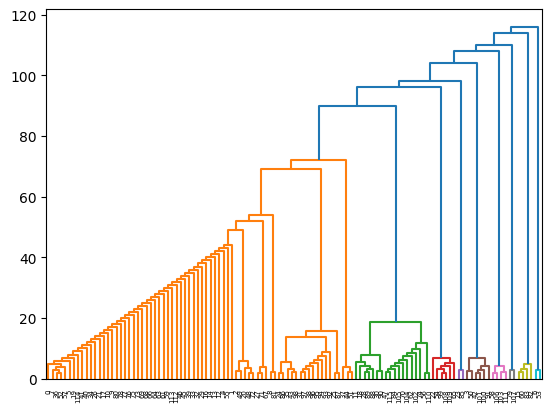

In [546]:
knows_graph_handler.showDendrogram()

The Louvain algorithm found 8 partitions.
Partition 0 is {64, 65, 66, 67, 68, 69, 7, 71, 73, 10, 75, 76, 77, 78, 80, 17, 27, 40, 55, 59, 61, 63}
Partition 1 is {97, 100, 101, 8, 72, 42, 110, 48, 81, 20, 85, 23, 56, 91}
Partition 2 is {49, 90, 2, 30}
Partition 3 is {96, 34, 98, 35, 38, 43, 31, 86, 24, 26, 92, 93, 95}
Partition 4 is {0, 1, 4, 5, 9, 12, 13, 14, 16, 19, 84, 29, 94, 32, 33, 36, 39, 45, 46, 112, 113, 52, 57}
Partition 5 is {3, 37, 41, 11, 44, 50, 51, 18, 87, 88, 89, 28, 25}
Partition 6 is {99, 6, 108, 109, 15, 114, 82, 83, 53, 54, 22, 60}
Partition 7 is {70, 103, 102, 104, 105, 74, 106, 107, 111, 47, 79, 115, 21, 58, 62}


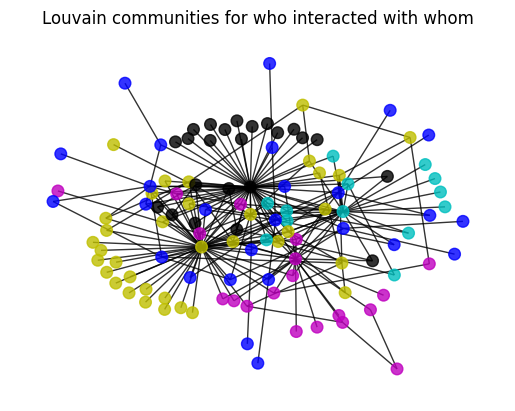

In [547]:
knows_graph_handler.showLouvainCommunities(title="Louvain communities for who interacted with whom")

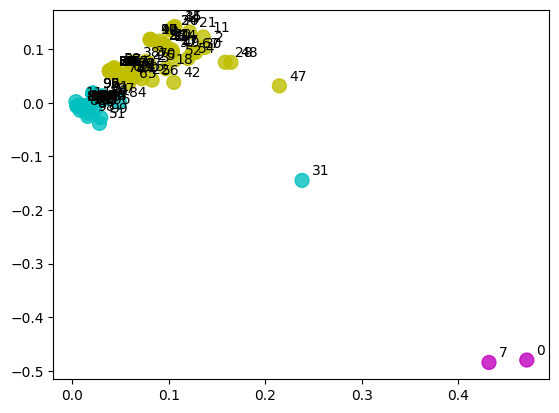

In [548]:
from utilities import get_largest_vectors, get_clusters
num_clusters = 3
A = nx.linalg.adjacency_matrix(knows_graph).toarray()
big1, big2 = get_largest_vectors(A)
z = form_encoding(big1, big2)
kmeans = get_clusters(z, num_clusters = num_clusters)
labels = kmeans.labels_
color_template = ['y', 'c', 'm', 'k', 'red', 'green', 'lightblue']
color = [color_template[x%len(color_template)] for x in list(labels) ]
plt.scatter(z[:,0], z[:,1],s=100,alpha = 0.8, color = color);
ax = plt.gca()
for i, txt in enumerate(range(len(knows_graph.nodes))):
    ax.annotate(txt, (z[i,0] + 0.01, z[i,1] + 0.01))

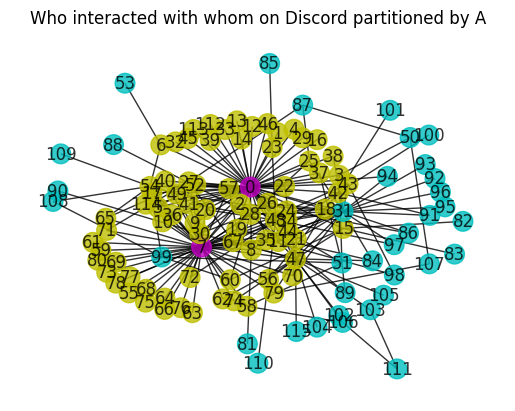

In [549]:
knows_graph_handler.showGraph(title="Who interacted with whom on Discord partitioned by A", agent_colors=color, with_labels=True)

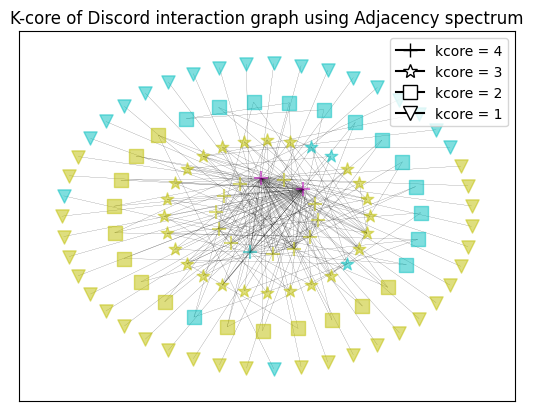

In [550]:
knows_graph_handler.show_kCores_by_partition(color, title = "K-core of Discord interaction graph using Adjacency spectrum")

---
One-off figure for slide on movies database

[1, 2, 3, 4, 5, 'a', 'b', 'c']


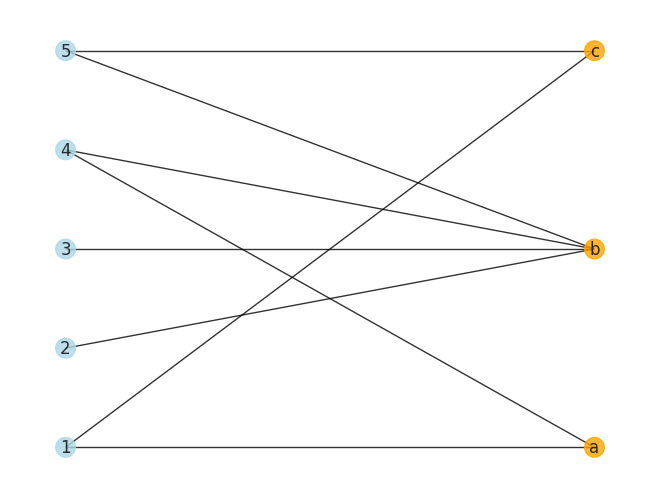

In [551]:
Bipartite = nx.Graph()
Bipartite.add_nodes_from((1,2,3,4,5,'a','b','c'))
Bipartite.add_edges_from([(1,'a'),(1,'c'),
                  (2,'b'),
                  (3,'b'),
                  (4,'a'),(4,'b'),
                  (5,'b'),(5,'c')])
colormap = ['lightblue','lightblue','lightblue','lightblue','lightblue',
            'orange','orange','orange']
print([node for node in Bipartite.nodes])
pos = nx.bipartite_layout(Bipartite,[1,2,3,4,5])
nx.draw(Bipartite, pos, node_color = colormap, with_labels = True, node_size = 200, alpha=0.8)

In [552]:
A = nx.linalg.adjacency_matrix(Bipartite).toarray()
print(A@A)

[[2 0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 0]
 [1 1 1 2 1 0 0 0]
 [1 1 1 1 2 0 0 0]
 [0 0 0 0 0 2 1 1]
 [0 0 0 0 0 1 4 1]
 [0 0 0 0 0 1 1 2]]


In [553]:
M = A@A
M = M[0:5,0:5]
for i in range(5):
    M[i,i]=0
print(M)

[[0 0 0 1 1]
 [0 0 1 1 1]
 [0 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]
